# Poster Genres Prediction

# Multi-Label classification

## Info:
- Givem POSTERS of films
- Given their corrisponding description (GENRES)
- The model predicts the corrisponding GENRES given the image

## Multi-Label:
- eg. a film can be an Horror and Drama and a Comedy
- Therefore I have a vector Y with k genres and the corrisponding ones for a given film are set to 1

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
import math

# Preprocessing

## Loading the Dataset

In [2]:
df = pd.read_csv('/Users/simoneboesso/Desktop/Movies-Poster_Dataset/train.csv')

# Extracting the Genres

In [4]:
All_genres = df.columns
All_genres = All_genres[2:]
All_genres = list(All_genres)

# Dropping the Labels that are not in my sample!

In [5]:
columns_to_be_dropped = []
for genre in All_genres:
    if df[df[genre]==1].shape[0] == 0:
        columns_to_be_dropped.append(genre)
if len(columns_to_be_dropped)>0 :
    print(f"{columns_to_be_dropped}: These columns were dropped because they're always equal to 0.")
    df = df.drop(columns=columns_to_be_dropped)
    for column in columns_to_be_dropped:
        All_genres.remove(column)


# Defining the GLOBAL VARIABLES

In [6]:
NUMBER_OF_CLASSES = len(All_genres) 
WIDTH = 200
HEIGHT = 200
INPUT_SHAPE = (WIDTH, HEIGHT, 3)  
FILTER_SIZE = (3, 3)  
POOL_SIZE = (2, 2)
PATH = "/Users/simoneboesso/Desktop/Movies-Poster_Dataset/Images/"


In [7]:
from keras.preprocessing import image

def create_X_features_from_Images(width,height):
    X = []
    for i in tqdm(range(df.shape[0])):
        path = PATH +df['Id'][i]+'.jpg'
        img = image.load_img(path,target_size=(width,height,3))      
        img = image.img_to_array(img)
        img = img/255.0
        X.append(img)
    return np.array(X)

X = create_X_features_from_Images(WIDTH,HEIGHT)

100%|██████████| 7254/7254 [00:09<00:00, 801.47it/s]


In [8]:
X.shape

(7254, 200, 200, 3)

In [9]:
y = df.drop(['Id','Genre',"N/A"],axis=1)
NUMBER_OF_CLASSES  = NUMBER_OF_CLASSES -1
y_col = y.columns
y = y.to_numpy()
y.shape

(7254, 24)

# Splitting the dataset

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Defining the architecture

In [11]:
import tensorflow as tf
from tensorflow.keras import backend as K

def hamming_distance(y_true, y_pred):
    y_true = K.round(y_true)
    y_pred = K.round(y_pred)
    # Ensure both tensors are of the same type
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')
    return K.mean(K.not_equal(y_true, y_pred))


In [12]:
# Define the model architecture
model = Sequential([
    Input(INPUT_SHAPE),

    Conv2D(32, FILTER_SIZE, activation='relu'),
    Dropout(0.3),
    MaxPooling2D(pool_size=POOL_SIZE),

    Conv2D(64, FILTER_SIZE, activation='relu'),
    Dropout(0.4),
    MaxPooling2D(pool_size=POOL_SIZE),

    Conv2D(128, FILTER_SIZE, activation='relu'),
    Dropout(0.5),
    MaxPooling2D(pool_size=POOL_SIZE),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(258, activation='relu'),
    Dropout(0.5),
    Dense(NUMBER_OF_CLASSES, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy',hamming_distance])

# Show a summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 198, 198, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 97, 97, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    69,338,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 258)            │       132,354 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 258)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         6,216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,094,730 (267.39 MB)

 Trainable params: 70,094,730 (267.39 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
516//2

258

In [14]:
from keras.callbacks import  EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
callbacks_list = [ early_stop]

In [15]:
BatchSize = 64
NUMBER_OF_EPOCHS = 50

history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BatchSize,
    epochs=NUMBER_OF_EPOCHS,
    validation_data=(X_test, y_test),
    callbacks = callbacks_list 
)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - binary_accuracy: 0.8487 - hamming_distance: 0.1513 - loss: 0.4460 - val_binary_accuracy: 0.9047 - val_hamming_distance: 0.0955 - val_loss: 0.3411
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - binary_accuracy: 0.9026 - hamming_distance: 0.0974 - loss: 0.2699 - val_binary_accuracy: 0.9045 - val_hamming_distance: 0.0957 - val_loss: 0.2892
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - binary_accuracy: 0.9042 - hamming_distance: 0.0958 - loss: 0.2612 - val_binary_accuracy: 0.9045 - val_hamming_distance: 0.0957 - val_loss: 0.2818
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - binary_accuracy: 0.9066 - hamming_distance: 0.0934 - loss: 0.2540 - val_binary_accuracy: 0.9044 - val_hamming_distance: 0.0958 - val_loss: 0.2725
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - binary_accuracy: 0.9077 - hamming_distance: 0.0923 - loss: 0.2507 - val_binary_accuracy: 0.9046 - val_hamming_distance: 0.0956 - val_loss: 0.2625
Epoch

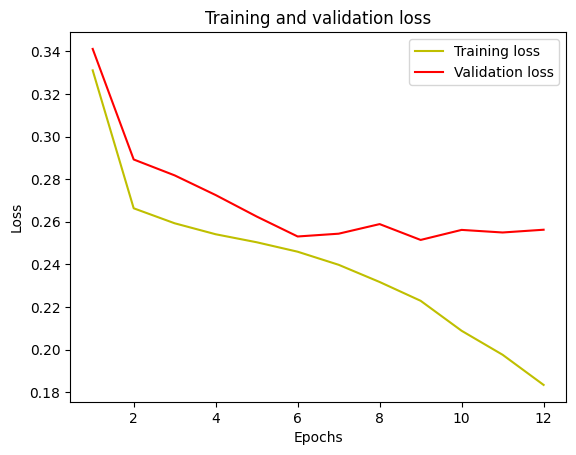

In [19]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

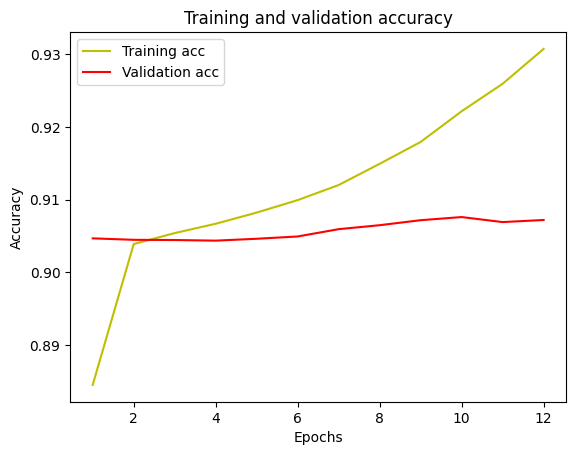

In [20]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Validation on a Test Image:

[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


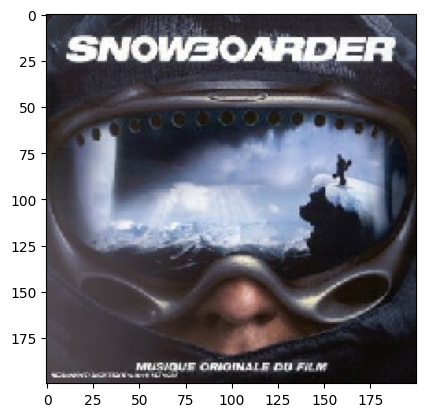

In [31]:
#Validate on an image
print(y_test[1])
img = X_test[1]
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(y_col) 
proba = model.predict(img)  
preds = (proba>0.5).astype(int)
print(preds)
df = pd.DataFrame(data=preds, columns=classes)
df